In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import numpy as np

fruits = np.load("/home/yj/kuuniv.bigdata2025/ml_dl_python/data/fruits_300.npy")
print(fruits.shape)

(300, 100, 100)


In [29]:
fruits_2d = fruits.reshape(300, 10000)


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [31]:
print(pca.components_.shape)


(50, 10000)


In [32]:
def draw_fruits(arr: np.ndarray, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False
    )
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()

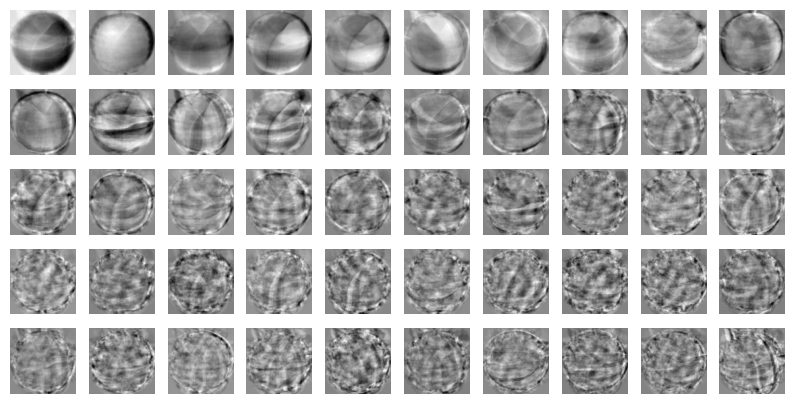

In [33]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [34]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [35]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [36]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

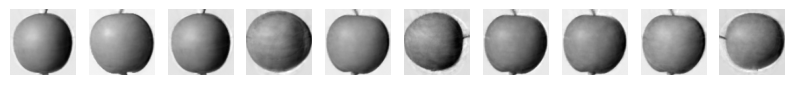

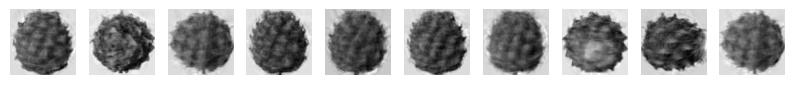

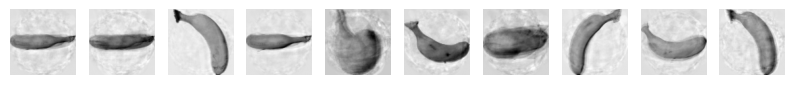

In [37]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 10])


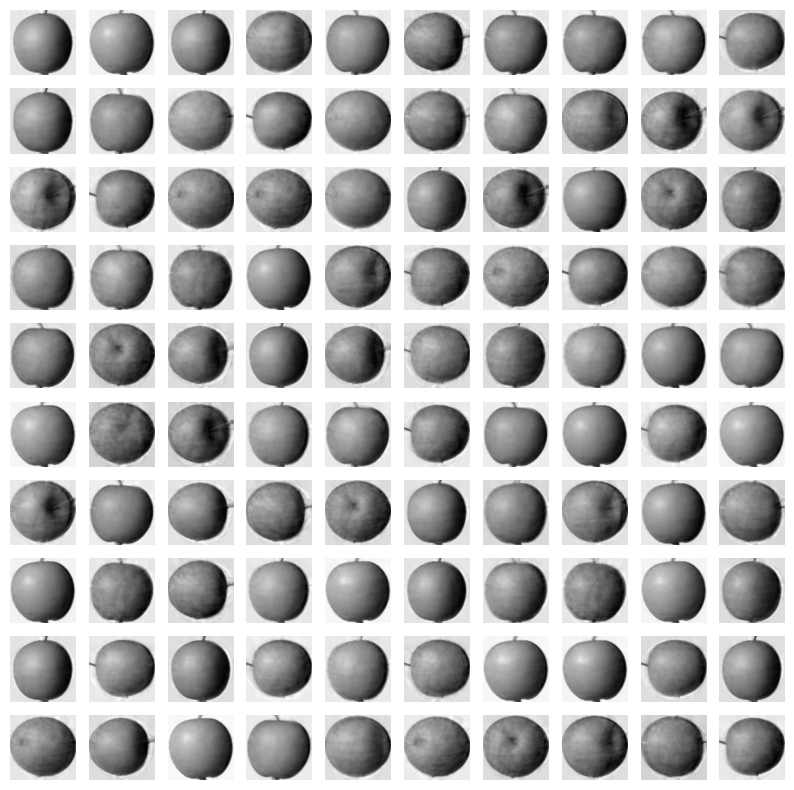

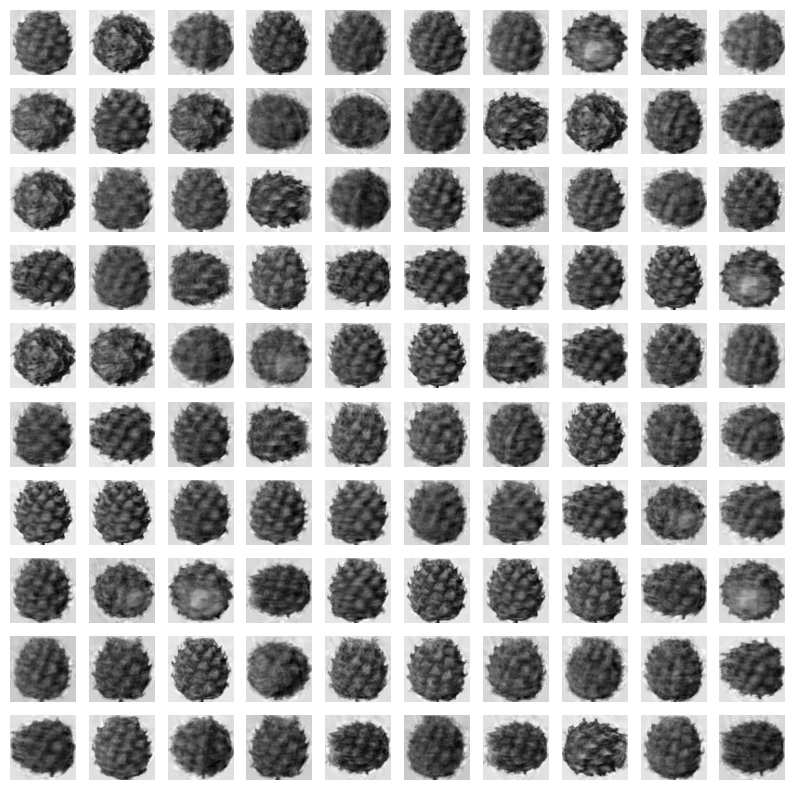

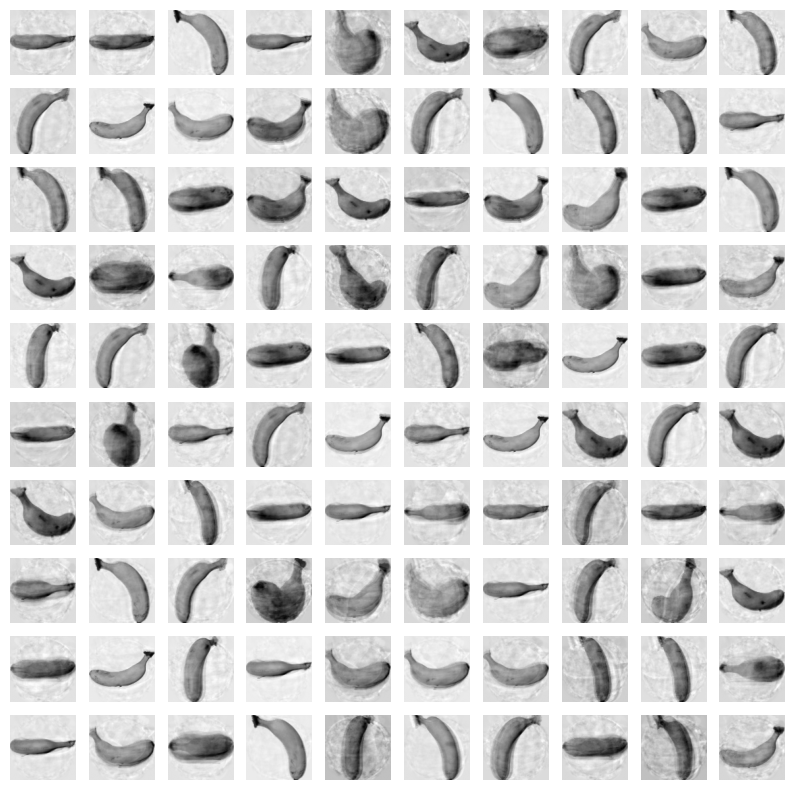

In [38]:
# 원본 데이터와 재구성된 데이터 비교
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 100])
print("\n")

# 설명된 분산

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.9215187851178257


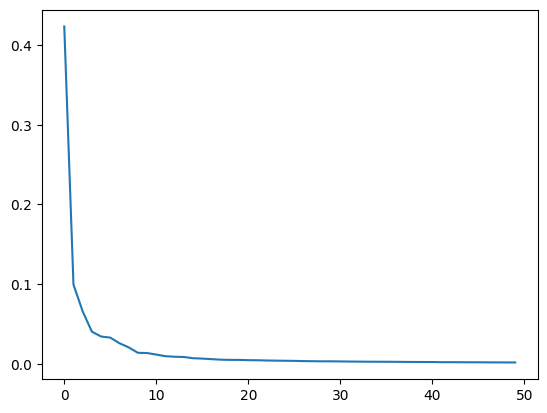

In [40]:
plt.plot(pca.explained_variance_ratio_)

# 다른 알고리즘과 함께 사용하기

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [42]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [43]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.std(scores["fit_time"]))

0.3773465683001588
0.1197824526437333


In [44]:
pca = PCA(n_components=5)
pca.fit(fruits_2d)

PCA(n_components=5)

In [45]:
print(pca.n_components_)
# PCA를 사용한 분류

5


In [46]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 5)


In [47]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.std(scores["fit_time"]))
# PCA를 사용한 분류 후 재구성

0.19944787817965395
0.0022198921523395357


In [48]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [49]:
print(np.unique(km.labels_, return_counts=True))
# KMeans 클러스터링 결과 시각화

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


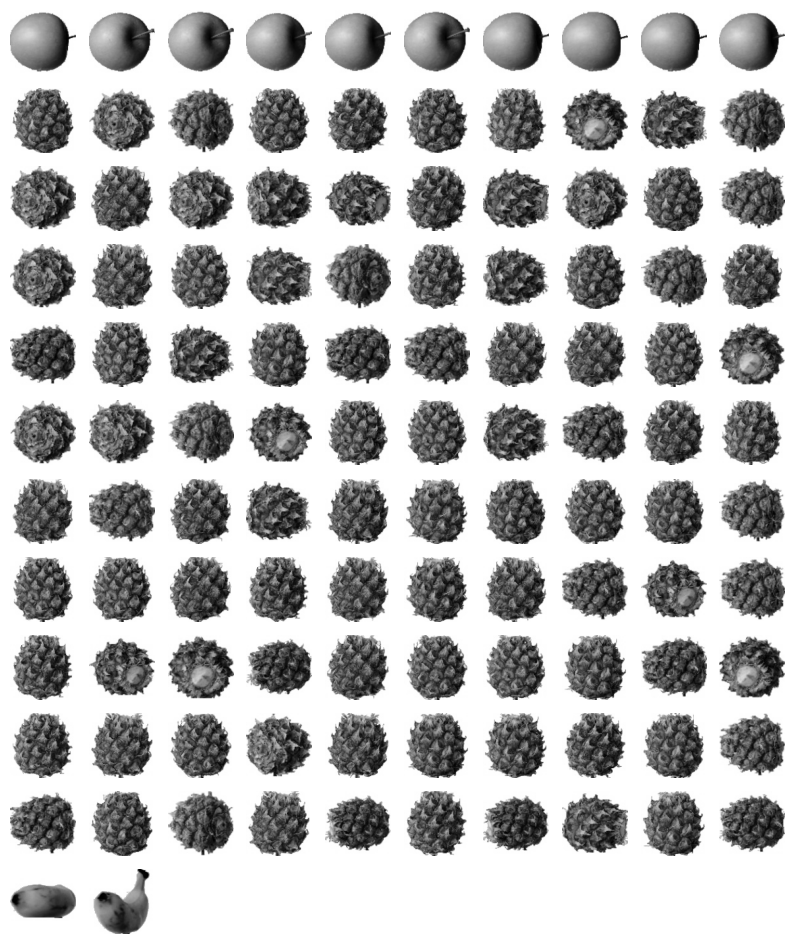

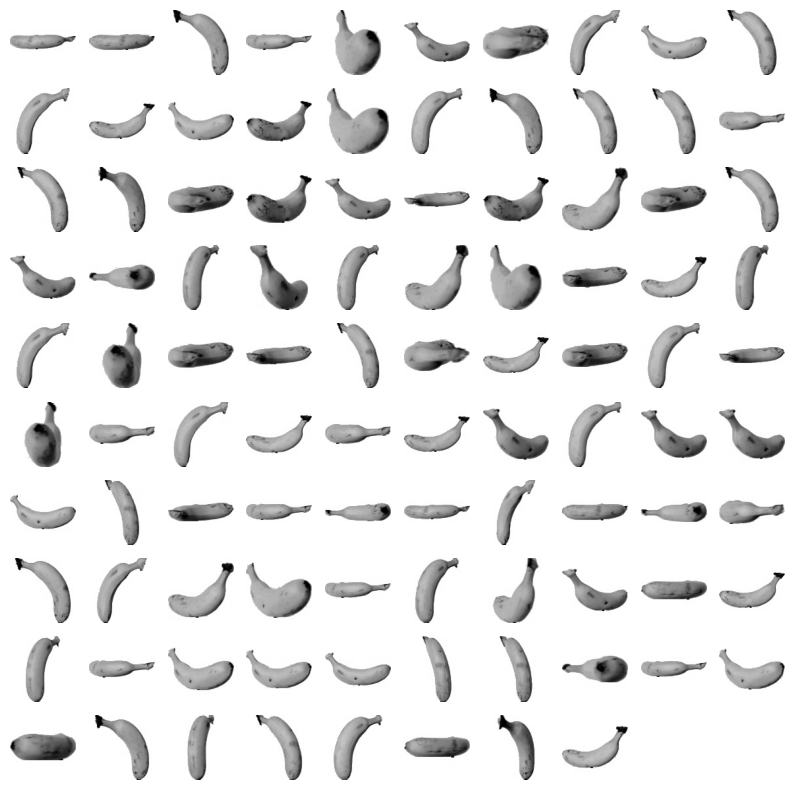

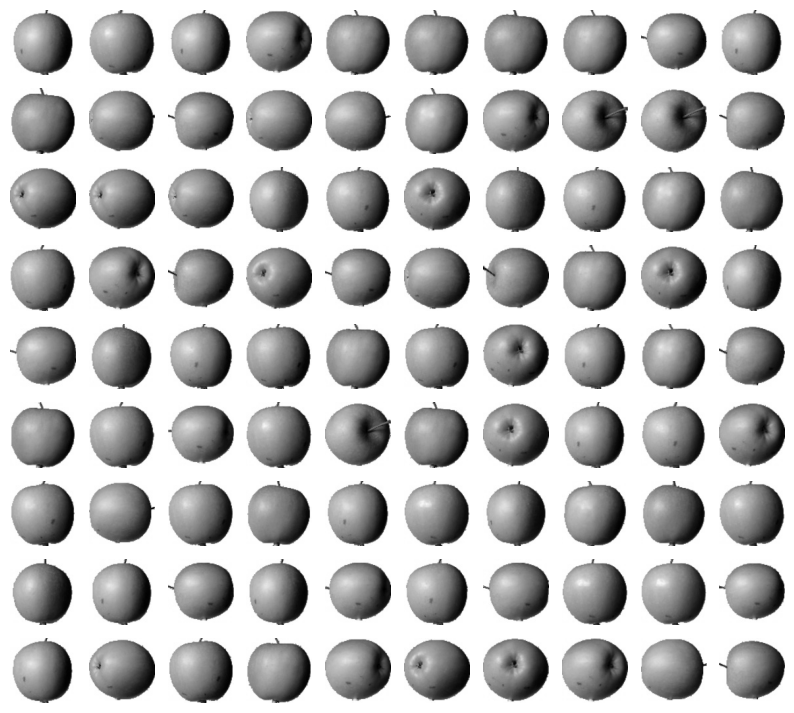

In [50]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label]) 
    print("\n")

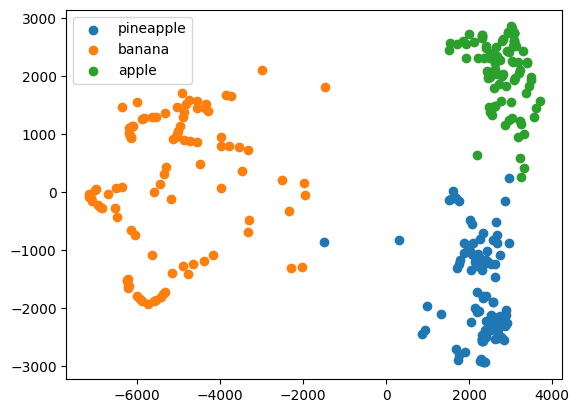

In [51]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

In [52]:
# 계층적 군집화
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = AgglomerativeClustering(n_clusters=10, linkage='ward', metric='euclidean')
labels = cluster.fit(fruits_pca).labels_


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([27, 24, 27, 15, 17, 53, 47, 37, 37, 16]))


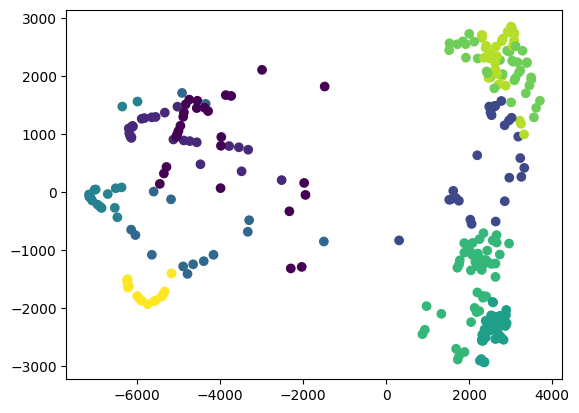

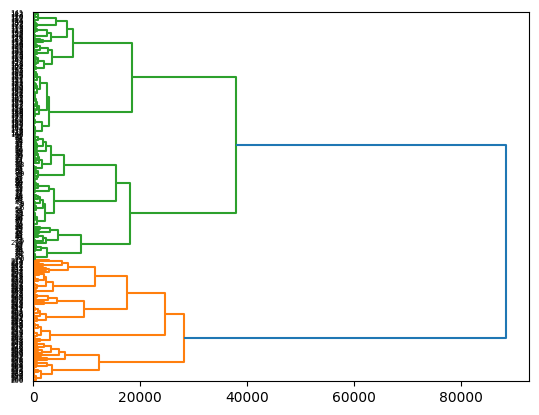

In [53]:
plt.scatter(fruits_pca[:,0], fruits_pca[:,1], c=labels)
plt.show()
# 계층적 군집화 시각화
linkage_array = linkage(fruits_pca, 'ward')
dendrogram(linkage_array, orientation='right')
plt.show()
